<a id=top-page></a>
# Generate images for Fig. 3

***

In [1]:
import numpy as np
import cmcrameri.cm as cmc
import matplotlib.pyplot as plt
from pykitPIV import Particle, FlowField, Motion, Image, Postprocess

In [2]:
n_images = 2

In [3]:
image_size = (500,500)

In [4]:
size_buffer = 10

In [5]:
figsize = (6,3.5)

<a id=generate-particles></a>
***

## Generate particles

[Go to the top](#top-page)

In [6]:
particles = Particle(n_images, 
                     size=image_size, 
                     size_buffer=size_buffer,
                     diameters=(2,4),
                     distances=(1,2),
                     densities=(0.2,0.26),
                     signal_to_noise=(5,20),
                     diameter_std=0.5,
                     seeding_mode='random', 
                     random_seed=100)

In [7]:
image = Image(random_seed=100)

In [8]:
image.add_particles(particles)

Particles added to the image.


In [9]:
flowfield = FlowField(n_images,
                      size=image_size,
                      size_buffer=size_buffer,
                      random_seed=100)

In [10]:
flowfield.generate_random_velocity_field(gaussian_filters=(10,11),
                                         n_gaussian_filter_iter=20,
                                         displacement=(0,10))

In [11]:
image.add_flowfield(flowfield)

Velocity field added to the image.


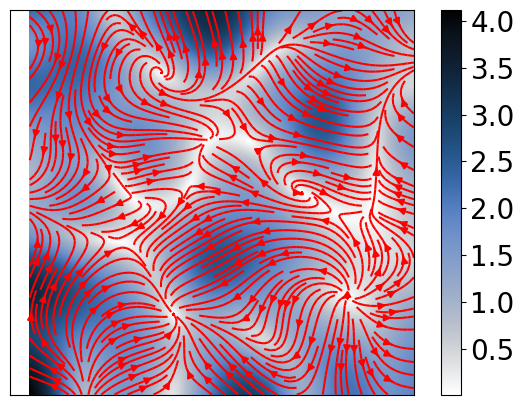

In [12]:
plt = image.plot_velocity_field_magnitude(0,
                                    with_buffer=False,
                                    xticks=False,
                                    yticks=False,
                                    add_streamplot=True,
                                    streamplot_density=2,
                                    streamplot_color='r',
                                    cmap=cmc.oslo_r,
                                    cbar=True,
                                    cbar_fontsize=20,
                                    figsize=(7,5),
                                    filename='Image_plot_velocity_field_magnitude.png');

plt.savefig('Image_plot_velocity_field_magnitude.svg', dpi=300, bbox_inches='tight', transparent=True)

<a id=add-movement></a>
***

## Add movement to particles

[Go to the top](#top-page)

In [24]:
motion = Motion(particles, 
                flowfield, 
                time_separation=1)

In [25]:
motion.forward_euler(n_steps=10)

<a id=add-movement-visualize></a>

#### Visualize the PIV image pair:

[Go to the top](#top-page)

In [26]:
image.add_motion(motion)

Particle movement added to the image.


In [31]:
image.add_reflected_light(exposures=(0.6,0.65),
                          maximum_intensity=2**16-1,
                          laser_beam_thickness=1,
                          laser_over_exposure=1,
                          laser_beam_shape=0.95,
                          alpha=1/10)

Reflected light added to images I1.
Reflected light added to images I2.


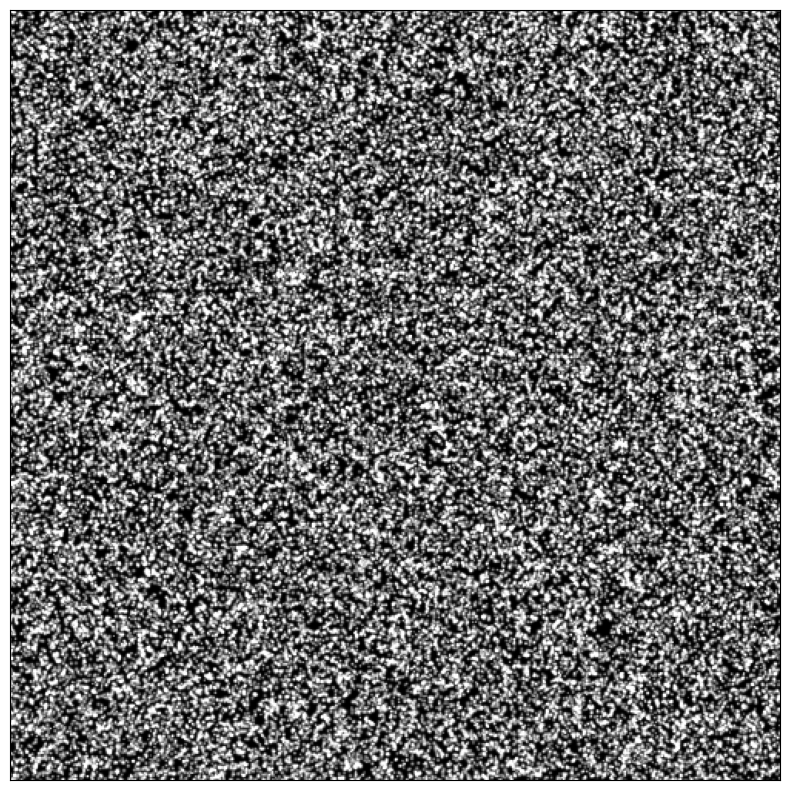

In [32]:
image.plot(0, 
           instance=1,
           with_buffer=False,
           xticks=False,
           yticks=False,
           cmap='Greys_r',
           figsize=(10,10));

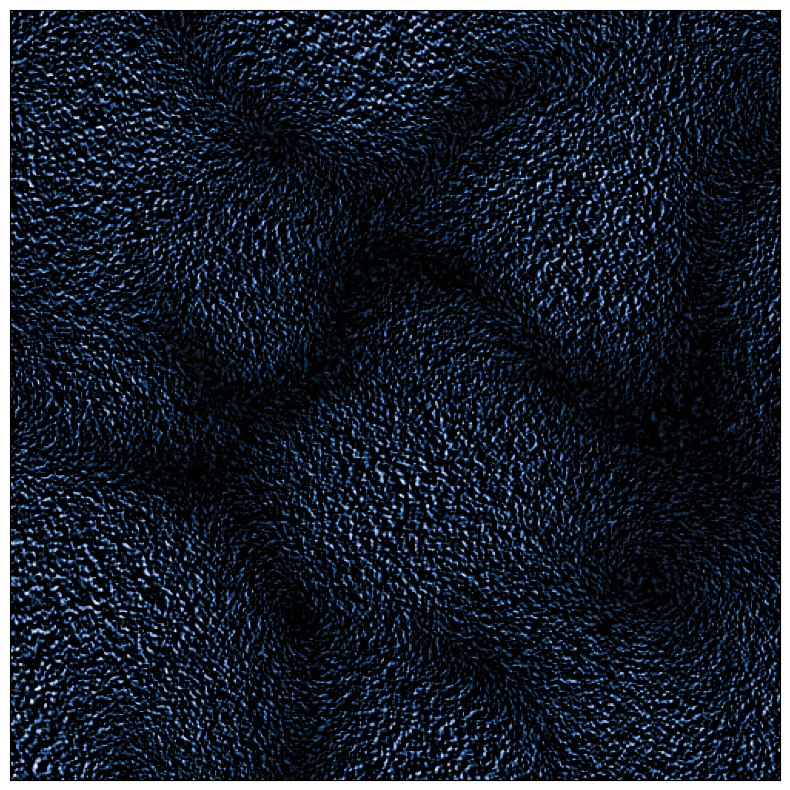

In [33]:
image.plot_image_pair(0,
                      with_buffer=False,
                      xticks=False,
                      yticks=False,
                      cmap=cmc.oslo,
                      # cmap='viridis',
                      figsize=(10,10), 
                      filename='Image_plot_image_pair.png');

***